<a href="https://colab.research.google.com/github/md05-portfolio/Microsoft_ML_Challenge/blob/main/Explore_RWD_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective** : Describe the data consisting of student grades, and discuss how to make basic comparisons between data.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Load data from a Microsoft Github Training folder
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
students_df = pd.read_csv('grades.csv',delimiter=',',header='infer')
students_df.head()

--2023-08-08 01:53:23--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv.1’

grades.csv.1        100%[===================>]     322  --.-KB/s    in 0s      

2023-08-08 01:53:23 (11.7 MB/s) - ‘grades.csv.1’ saved [322/322]



,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [6]:
students_df.describe()

,StudyHours,Grade
count,23.000000,22.000000
mean,10.413043,49.181818
std,3.447338,21.737912
min,1.000000,3.000000
25%,8.750000,36.250000
50%,10.000000,49.500000
75%,12.250000,62.750000
max,16.000000,97.000000


In [4]:
#identify missing data
students_df[students_df.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [7]:
'''Remove any rows with missing data. Since Grades is a determining field, safe to assume these rows can be eliminated.
Other option would be to impute using fillna such as below :
students_df.StudyHours = students_df.StudyHours.fillna(students_df.StudyHours.mean())
'''
students_df = students_df.dropna(axis=0, how='any')

In [8]:
# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(students_df['Grade'] >= 60)

In [9]:
# Add a column indicating who passed to the Pandas dataframe
students_df = pd.concat([students_df, passes.rename("Pass")], axis=1)

# Print the result to review
print(students_df)

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True


In [10]:
# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will plot a distribution (graph) and display
    '''

    # Get basic descriptive statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,mean_val,med_val,mod_val,max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (8,4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



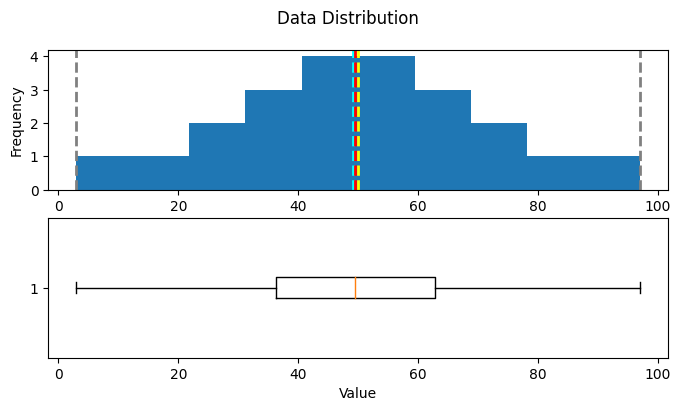

In [11]:
#Test the function and check the distribution on Grades
show_distribution(students_df['Grade'])

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



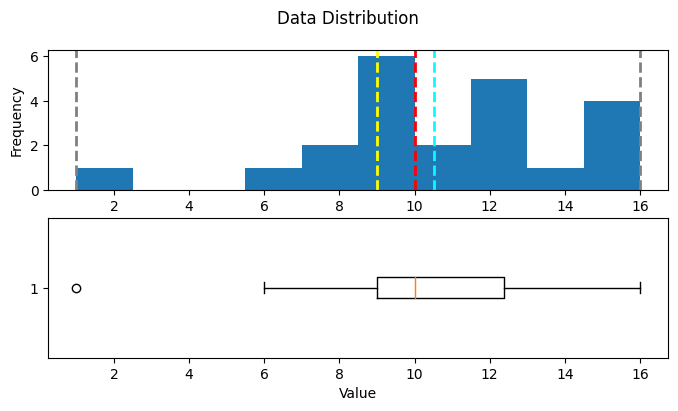

In [13]:
#Yay! As we would have expected by looking at describe command, grades are spread symmetrically
#Lets examine StudyHours
sh = students_df['StudyHours']
# Call the function
show_distribution(sh)